# 1. Configuración Inicial

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np

# 2. Cargamos los datos de imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

1654784/1641221 [==============================] - 0s 0us/step


In [4]:
for i in train_data[0]:
    print(word_index.get( i - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

# 3. Función de one-hot encoding - Vectorizar palabras

In [5]:
# Vectorizamos las palabras
def vectorizar(sequences, dim=10000):
    
    restults = np.zeros((len(sequences),dim))
    
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    
    return restults

# 4. Transformamos los datos

In [6]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 5. Creamos el modelo

In [7]:
# Instanciamos el modelo
model = models.Sequential()

# Agregamos las capas
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))

# Nuestra capa de salida es una Sigmoid porque tenemos un problema de clasificación binaria
model.add(layers.Dense(1, activation='sigmoid'))

# 6. Compilamos el modelo

In [8]:
# Compilamos
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

# 7. Validamos el modelo

In [9]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

# 8. Entrenamos el modelo

In [10]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5205 - accuracy: 0.7798 - val_loss: 0.3916 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3139 - accuracy: 0.9019 - val_loss: 0.3114 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2271 - accuracy: 0.9269 - val_loss: 0.2885 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1783 - accuracy: 0.9426 - val_loss: 0.2890 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1470 - accuracy: 0.9525 - val_loss: 0.2831 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1198 - accuracy: 0.9635 - val_loss: 0.2915 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1011 - accuracy: 0.9700 - val_loss: 0.3086 - val_accuracy: 0.8819
Epoch 8/20
30

# 9. Analizamos el modelo

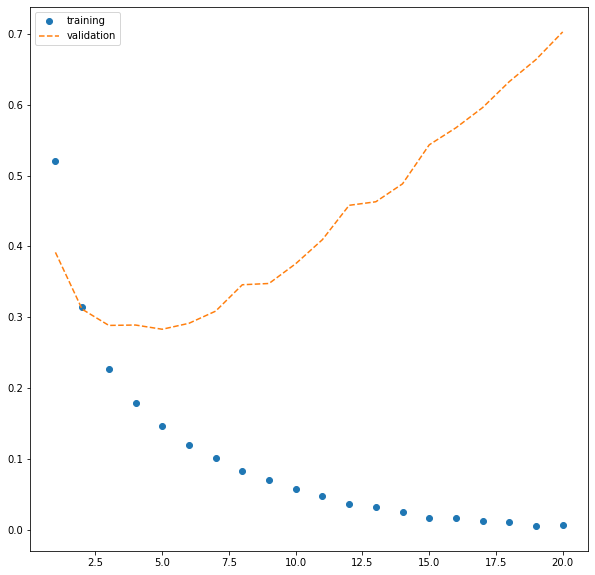

In [11]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show();

# 10. Evaluamos el modelo

In [12]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7628 - accuracy: 0.8522


[0.7628476619720459, 0.8521599769592285]

# 11. Predicciones

In [13]:
predictions = model.predict(X_test)
display(predictions[1])

array([1.], dtype=float32)

# 12. Creamos un modelo menos complejo

In [14]:
# Instanciamos el modelo
model2 = models.Sequential()

# Agregamos las capas
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))

# Nuestra capa de salida es una Sigmoid porque tenemos un problema de clasificación binaria
model2.add(layers.Dense(1, activation='sigmoid'))

# Compilamos
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

# Entrenamos
history2 = model2.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6342 - accuracy: 0.6470 - val_loss: 0.5845 - val_accuracy: 0.6919
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5517 - accuracy: 0.7701 - val_loss: 0.5394 - val_accuracy: 0.7842
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5063 - accuracy: 0.8320 - val_loss: 0.5102 - val_accuracy: 0.8202
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4722 - accuracy: 0.8657 - val_loss: 0.4941 - val_accuracy: 0.8183
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4443 - accuracy: 0.8912 - val_loss: 0.4797 - val_accuracy: 0.8340
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4205 - accuracy: 0.9115 - val_loss: 0.4714 - val_accuracy: 0.8409
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4004 - accuracy: 0.9231 - val_loss: 0.4558 - val_accuracy: 0.8686
Epoch 8/20
30

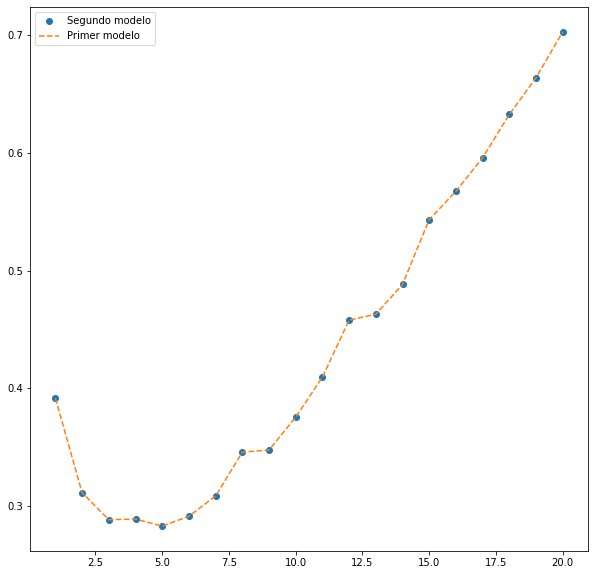

In [15]:
# Gráfica
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='Segundo modelo')
plt.plot(epoch,val_loss_values, '--',label='Primer modelo')
plt.legend()
plt.show();

# 13. Modelo con Regularización

In [16]:
from keras import regularizers

In [17]:
# Instanciamos el modelo
model3 = models.Sequential()

# Agregamos las capas
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Nuestra capa de salida es una Sigmoid porque tenemos un problema de clasificación binaria
model3.add(layers.Dense(1, activation='sigmoid'))

# Compilamos
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

# Entrenamos
history3 = model3.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5452 - accuracy: 0.7885 - val_loss: 0.4392 - val_accuracy: 0.8456
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3516 - accuracy: 0.9041 - val_loss: 0.3646 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2860 - accuracy: 0.9235 - val_loss: 0.3338 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2527 - accuracy: 0.9336 - val_loss: 0.3354 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2298 - accuracy: 0.9426 - val_loss: 0.3373 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2183 - accuracy: 0.9457 - val_loss: 0.3442 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2030 - accuracy: 0.9553 - val_loss: 0.3781 - val_accuracy: 0.8711
Epoch 8/20
30

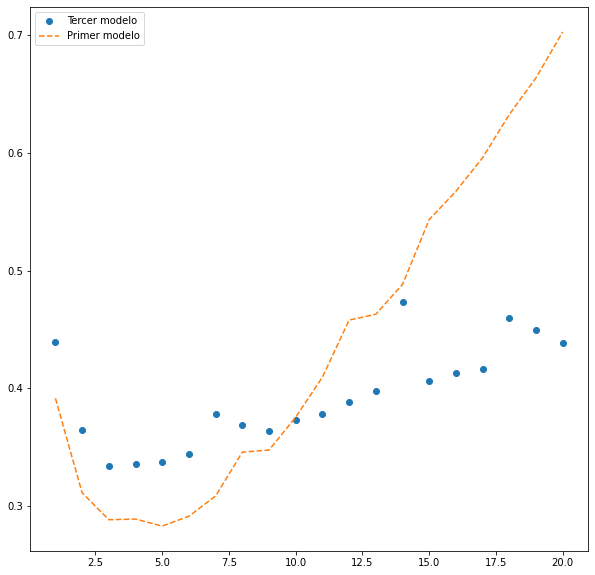

In [18]:
# Gráfica
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values3 = history3.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='Tercer modelo')
plt.plot(epoch,val_loss_values, '--',label='Primer modelo')
plt.legend()
plt.show();

# 14. Modelo con Dropout

In [19]:
# Instanciamos el modelo
model4 = models.Sequential()

# Agregamos las capas
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))

# Nuestra capa de salida es una Sigmoid porque tenemos un problema de clasificación binaria
model4.add(layers.Dense(1, activation='sigmoid'))

# Compilamos
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

# Entrenamos
history4 = model4.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6703 - accuracy: 0.5400 - val_loss: 0.6279 - val_accuracy: 0.8108
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6346 - accuracy: 0.5775 - val_loss: 0.5675 - val_accuracy: 0.8505
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6109 - accuracy: 0.5975 - val_loss: 0.5334 - val_accuracy: 0.8641
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5895 - accuracy: 0.6051 - val_loss: 0.5022 - val_accuracy: 0.8727
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5740 - accuracy: 0.6125 - val_loss: 0.4857 - val_accuracy: 0.8735
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5575 - accuracy: 0.6208 - val_loss: 0.4704 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5498 - accuracy: 0.6226 - val_loss: 0.4278 - val_accuracy: 0.8869
Epoch 8/20
30

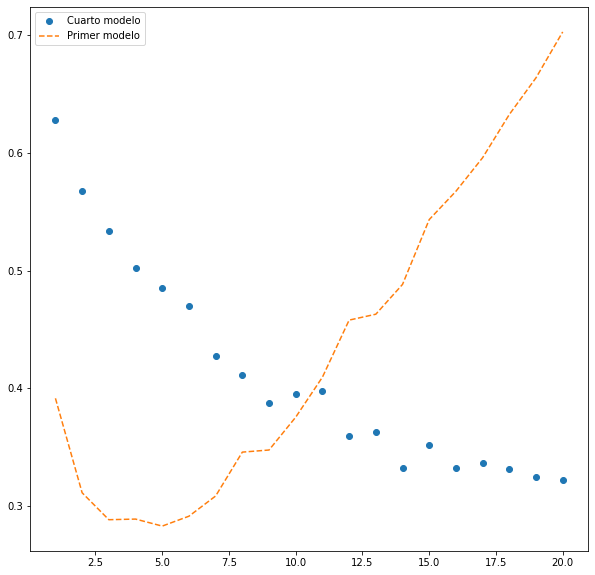

In [20]:
# Gráfica
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values4 = history4.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='Cuarto modelo')
plt.plot(epoch,val_loss_values, '--',label='Primer modelo')
plt.legend()
plt.show();